In [12]:
#Installing

!pip install sqlalchemy pymysql pandas

In [14]:
# Best Practices - imports at the top
import os
import getpass
import dotenv
import datetime
import time
import random
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load environment variables from a .env file
dotenv.load_dotenv()

# Get credentials and connection info from environment variables or prompt if missing
username = os.getenv("SQL_USERNAME")
host = os.getenv("SQL_HOST")
password = os.getenv("SQL_PASSWORD")
port = os.getenv("SQL_PORT")

if username is None:
    username = input("Enter username: ")
    
if host is None:
    host = input("Enter host: ")
    
if port is None:
    port = input("Enter port: ")
    
if password is None:
    password = getpass.getpass("Enter password: ")

# Create engine
engine = create_engine(
    f'mysql+pymysql://{username}:{password}@{host}:{port}/',
    connect_args={
        "ssl": {
            "ssl": True
        }
    }
)

# Querying the available databases
with engine.connect() as conn:
    result = conn.execute(text("SHOW DATABASES"))
    for row in result:
        print(row)


Enter username:  pbs2025bag0u50
Enter host:  3de0dac0-8513-4220-9ee7-414dc040c138.bn2a2uid0up8mv7mv2ig.databases.appdomain.cloud
Enter port:  31131
Enter password:  ········


('adidas',)
('building_maintenance',)
('classicmodels',)
('eleicoes',)
('grupo0',)
('information_schema',)
('pbs2025bag0u50',)
('performance_schema',)
('social_network',)
('ticketing',)


In [22]:
# Connect to a database of selection
database = username
engine = create_engine(
    f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}',
    connect_args={
        "ssl": {"ssl": True}
    }
)

# Show tables in the selected database
with engine.connect() as conn:
    result = conn.execute(text("SHOW TABLES"))
    for row in result:
        print(row[0])  # row is a tuple like ('table_name',)

buildings
requests
technicians
users


In [60]:
#this delete all lines from table of users,requests and technicians

from sqlalchemy import text

with engine.connect() as conn:
    conn.execute(text(f"USE {username};"))

    # Step 1: Nullify foreign key references in requests
    conn.execute(text("""
        UPDATE requests
        SET user_id = NULL,
            assigned_to = NULL;
    """))
    conn.commit()

    # Step 2: Delete all rows from requests
    result_requests = conn.execute(text("DELETE FROM requests;"))
    conn.commit()

    # Step 3: Delete all rows from users
    result_users = conn.execute(text("DELETE FROM users;"))
    conn.commit()

    # Step 4: Delete all rows from technicians
    result_techs = conn.execute(text("DELETE FROM technicians;"))
    conn.commit()

    print(f"{result_requests.rowcount} requests deleted.")
    print(f"{result_users.rowcount} users deleted.")
    print(f"{result_techs.rowcount} technicians deleted.")

23 requests deleted.
12 users deleted.
6 technicians deleted.


In [62]:
# we want to personalize the data so we will add lines to our sql tables so we will add data like for example in users tab:

# Data with user_id manually assigned in order
data = [
    [1, "Joaquim Silva", "Joaquim.silva@gmail.com", 1],
    [2, "João Pedro Fontes", "j.p.99@hotmail.com", 2],
    [3, "Benjamim Carneiro", "benjamim.carneiro99@hotmail.com", 3],
    [4, "Caetana Melo", "caetana.melo47@hotmail.com", 4],
    [5, "Samuel Pinto", "samuel.pinto71@yahoo.com", 1],
    [6, "Gaspar Valente", "gaspar.valente23@yahoo.com", 2],
    [7, "Marcos Vinicius", "marcos.vinicius@yahoo.com", 4],
    [8, "Frederico Silva", "frederico.silva@hotmail.com", 4],
    [9, "Yara Domingues", "yara.domingues98@gmail.com", 1],
    [10, "Constança Marques", "Constança.marques81@yahoo.com", 1],
    [11, "Santiago Pinto", "santiago.pinto78@hotmail.com", 3],
    [12, "Cristiano Ronaldo", "cristiano.ronaldo@gmail.com", 4]
]

columns = ["user_id", "name", "email", "building_id"]

# Create and insert DataFrame
df_users = pd.DataFrame(data, columns=columns)
df_users.to_sql("users", con=engine, if_exists="append", index=False)

print("✅ Users with explicit user_id successfully inserted into the 'users' table.")

✅ Users with explicit user_id successfully inserted into the 'users' table.


In [65]:
# Technician data with manually assigned technician_id
data = [
    [1, "Pedro Silva Técnico", "pedrosilva.tecnico@manutencao.pt", "Electrical"],
    [2, "Cristiana Canalizadora", "Cristiana.canalizadora@manutencao.pt", "Plumbing"],
    [3, "Tiago HVAC", "Tiago.ar.pt@manutencao.pt", "HVAC"],
    [4, "Farjana Reparadora", "Farjana.reparadora@manutencao.pt", "Miscellaneous"],
    [5, "Amit Canalizador", "Amit.canalizador@manutencao.pt", "Plumbing"],
    [6, "Rui Técnico", "Rui.tecnico@manutencao.pt", "Electrical"]
]

columns = ["technician_id", "name", "email", "specialty"]

# Create and insert DataFrame
df_techs = pd.DataFrame(data, columns=columns)
df_techs.to_sql("technicians", con=engine, if_exists="append", index=False)

print("✅ Technicians with technician_id successfully inserted into the 'technicians' table.")

✅ Technicians with technician_id successfully inserted into the 'technicians' table.


In [67]:
# Data with manually assigned request_id starting from 1
data = [
    [1, 6, 2, "Falta de pressão na água.", "Plumbing", "Low", "In Progress", "2025-04-25 07:57:00", None, 2],
    [2, 1, 1, "Trocar lâmpadas.", "Electrical", "Low", "Open", "2025-04-25 07:57:00", None, 1],
    [3, 2, 2, "Mau funcionamento do controlo remoto.", "HVAC", "Medium", "Resolved", "2025-04-25 07:57:00", None, 3],
    [4, 3, 3, "Tomada queimada na área de serviço.", "Electrical", "Medium", "In Progress", "2025-04-25 07:57:00", None, 1],
    [5, 4, 4, "Ventilador no teto faz barulho.", "Miscellaneous", "Low", "Open", "2025-04-25 07:57:00", None, 4],
    [6, 5, 1, "Sanitas entupidas.", "Plumbing", "High", "Open", "2025-04-25 07:57:00", None, 2],
    [7, 6, 2, "Ar condicionado está a pingar água.", "HVAC", "High", "Resolved", "2025-04-25 07:57:00", None, 3],
    [8, 3, 3, "Luz do corredor a piscar.", "Electrical", "Medium", "Resolved", "2025-04-25 07:57:00", None, 1],
    [9, 1, 1, "Má ventilação na cozinha.", "Miscellaneous", "Low", "Open", "2025-04-25 07:57:00", None, 4],
    [10, 2, 2, "Barulho estranho no aquecedor.", "Miscellaneous", "Medium", "In Progress", "2025-04-25 07:57:00", None, 4],
    [11, 3, 3, "Sistema de alarme com falhas.", "Miscellaneous", "High", "Resolved", "2025-04-25 07:57:00", None, 4],
    [12, 6, 2, "Escoamento lento da água", "Plumbing", "Medium", "Resolved", "2025-04-25 07:57:00", None, 2],
    [13, 6, 2, "Avaria no comando da garagem.", "Miscellaneous", "Medium", "Resolved", "2025-04-25 07:57:00", None, 4],
    [14, 5, 1, "Consumo excessivo de energia.", "HVAC", "Medium", "Resolved", "2025-04-25 07:57:00", None, 3],
    [15, 3, 3, "Rachadura na parede da sala.", "Miscellaneous", "Medium", "In Progress", "2025-04-25 07:57:00", None, 4],
    [16, 2, 2, "Tomada elétrica solta no quarto.", "Electrical", "Medium", "Resolved", "2025-04-25 07:57:00", None, 1],
    [17, 2, 2, "Problemas com a descarga.", "Plumbing", "Low", "In Progress", "2025-04-25 07:57:00", None, 2],
    [18, 3, 3, "Cheiro desagradável vindo dos esgotos", "Plumbing", "Medium", "In Progress", "2025-04-25 07:57:00", None, 2],
    [19, 4, 4, "Aparelho desliga sozinho com frequência", "HVAC", "Low", "Open", "2025-04-25 07:57:00", None, 3],
    [20, 5, 1, "Cano rebentado", "Plumbing", "High", "In Progress", "2025-04-25 07:57:00", None, 2],
    [21, 6, 2, "Teto da cozinha com alguma humidade.", "Miscellaneous", "Low", "Open", "2025-04-25 07:57:00", None, 4],
    [22, 3, 3, "Verificar validade dos extintores no prédio.", "Miscellaneous", "Medium", "Resolved", "2025-04-25 07:57:00", None, 4]
]

columns = ["request_id", "user_id", "building_id", "description_raw", "category", "urgency", "status", "submitted_at", "resolved_at", "assigned_to"]

# Create DataFrame and insert
df_requests = pd.DataFrame(data, columns=columns)
df_requests.to_sql("requests", con=engine, if_exists="append", index=False)

print("✅ All 22 requests with request_id inserted into the 'requests' table.")

✅ All 22 requests with request_id inserted into the 'requests' table.


In [120]:
# Set schema name here
schema = username

# --- User Validation ---
def getUser(username):
    # Query the database for a user with the provided name
    df_user = pd.read_sql(
        text(f"SELECT * FROM {schema}.users WHERE name = :user"),
        con=engine,
        params={"user": username}
    )
    if not df_user.empty:
        return df_user.iloc[0]  # Return the first match as a dictionary
    return None

# --- Input Validation ---
def validateCategory(category):
    # Validate if the provided category is one of the predefined options
    return category in ['Electrical', 'Plumbing', 'HVAC', 'Miscellaneous', 'Canalização']

def validateUrgency(urgency):
    # Validate if the urgency is within accepted values
    return urgency in ['Low', 'Medium', 'High']


# --- A. Submit New Request --
def newRequest():
    print("📨 SUBMIT NEW REQUEST")
    
    # Ask user for input and validate the user
    user = input("User Name:")
    dbUser = getUser(user)
    if dbUser is None:
        print("❌ User not found!")
        return

    # Validate category and urgency
    category = input("Category (Electrical, Plumbing, HVAC, Miscellaneous):")
    if not validateCategory(category):
        print("❌ Invalid category!")
        return

    urgency = input("Urgency (Low, Medium, High):")
    if not validateUrgency(urgency):
        print("❌ Invalid urgency!")
        return

    description = input("Decription of the issue:")

    # Prepare the request entry to be inserted in the database  
    entry = { 
        'request_id': None,
        'user_id': dbUser['user_id'], 
        'building_id': dbUser['building_id'],
        'description_raw': description,
        'category': category,
        'urgency': urgency,
        'status': 'Open',
        'submitted_at': datetime.datetime.now(),
        'resolved_at': None,
        'assigned_to': None
    }  
    
    # --- B. Insert Request in the Database ---   
    with engine.connect() as conn:
        transaction = conn.begin()
        conn.execute(
            text(f"""
                INSERT INTO {schema}.requests (
                    user_id, building_id, description_raw, category, urgency,
                    status, submitted_at, resolved_at, assigned_to
                ) VALUES (
                    :user_id, :building_id, :description_raw, :category, :urgency,
                    :status, :submitted_at, :resolved_at, :assigned_to
                )
            """),
            entry
        )
        result = conn.execute(text(f"SELECT MAX(request_id) FROM {schema}.requests"))
        entry['request_id'] = result.scalar()
        transaction.commit()

    print(f"✅ Request submitted with ID: {entry['request_id']}")
    df_requests = pd.DataFrame([entry])
    display(df_requests)

    
# --- C-E. Simulated Workflow for a Request ---   
    stateMachine(entry)

def stateMachine(entry):
    print("⏳ Searching for a technician to handle the issue...")

    # C. Simulate wait time to look into the database of technicians
    time.sleep(random.uniform(10, 20))

    # D. Assign technician automatically based on category
    assigned = assignTechnician(entry)
    if not assigned:
        print("⚠️ Technician assignment failed.")
        return

    # Show updated request 
    df_updated_request = pd.read_sql(
        text(f"SELECT * FROM {schema}.requests WHERE request_id = :id"),
        con=engine,
        params={"id": entry['request_id']}
    )
    display(df_updated_request)
    
    print(f"⏳ Technician {entry['technician_name']} has been notified to handle the request...")
    
    # E. Simulate the technician being contacted
    time.sleep(random.uniform(10, 20))

    print("✅ Technician confirmation received.")


# --- Technician Assignment Based on Request Category ---
def assignTechnician(entry):
    df_technicians = pd.read_sql(
        text(f"SELECT * FROM {schema}.technicians WHERE specialty = :category"),
        con=engine,
        params={"category": entry['category']}
    )

    display(df_technicians)

    if df_technicians.empty:
        print("⚠️ No technician available for this category.")
        return False  

    # Randomly assign a technician
    technician_id = int(random.choice(df_technicians['technician_id']))
    entry['assigned_to'] = technician_id
    name = df_technicians[df_technicians['technician_id'] == technician_id]['name'].values[0]
    entry['technician_name'] = name

    # Update the request with the assigned technician
    with engine.connect() as conn:
        conn.execute(
            text(f"""
                UPDATE {schema}.requests
                SET assigned_to = :technician_id
                WHERE request_id = :request_id
            """),
            {"technician_id": technician_id, "request_id": entry['request_id']}
        )
        conn.commit()

    print(f"👷 Technician {name} has been selected from the available list to handle request {entry['request_id']}.")
    return True

    
# --- F. Update request status to "In Progress" ---
def acceptRequest():
    try:
        request_id = int(input("🛠 Enter the request ID to accept the task: "))

        # Check if request exists
        df_check = pd.read_sql(
            text(f"SELECT * FROM {schema}.requests WHERE request_id = :id"),
            con=engine,
            params={"id": request_id}
        )

        if df_check.empty:
            print(f"❌ Request ID {request_id} not found.")
            return

        if df_check.loc[0, 'status'] != 'Open':
            print(f"⚠️ Request ID {request_id} cannot be accepted because it is already marked as '{df_check.loc[0, 'status']}'.")
            return
            
        # Update request status to "In Progress"
        with engine.connect() as conn:
            transaction = conn.begin()
            conn.execute(
                text(f"""
                    UPDATE {schema}.requests
                    SET status = 'In Progress'
                    WHERE request_id = :request_id
                """),
                {"request_id": request_id}
            )
            transaction.commit()

        # Show updated request
        df_updated_request2 = pd.read_sql(
            text(f"SELECT * FROM {schema}.requests WHERE request_id = :id"),
            con=engine,
            params={"id": request_id}
        )
    
        print(f"⚙️ Technician accepted and is now working on Request {request_id}")
        display(df_updated_request2)

    except Exception as e:
        print("❌ Error accepting the request:", e)


# --- G. Manually Close a Request and Mark as Resolved ---
def endRequest():
    try:
        request_id = int(input("🔧 Enter the request ID to resolve the case: "))
        
        df_check = pd.read_sql(
            text(f"SELECT * FROM {schema}.requests WHERE request_id = :id"),
            con=engine,
            params={"id": request_id}
        )

        if df_check.empty:
            print(f"❌ Request ID {request_id} not found in the system.")
            return

        if df_check.loc[0, 'status'] == 'Resolved':
            print(f"ℹ️ Request ID {request_id} is already RESOLVED.")
            return

        # Update the request as Resolved and record the resolution time
        resolved_time = datetime.datetime.now()

        with engine.connect() as conn:
            transaction = conn.begin()
            conn.execute(
                text(f"""
                    UPDATE {schema}.requests
                    SET status = 'Resolved',
                        resolved_at = :resolved_at
                    WHERE request_id = :request_id
                """),
                {"resolved_at": resolved_time, "request_id": request_id}
            )
            transaction.commit()
       
        df_updated_request3 = pd.read_sql(
            text(f"SELECT * FROM {schema}.requests WHERE request_id = :id"),
            con=engine,
            params={"id": request_id}
        )
        
        # Calculate and format resolution duration
        submitted_at = pd.to_datetime(df_updated_request3.loc[0, 'submitted_at'])
        resolved_at = pd.to_datetime(df_updated_request3.loc[0, 'resolved_at'])
        duration = resolved_at - submitted_at
        total_seconds = int(duration.total_seconds())
        days, remainder = divmod(total_seconds, 86400)
        hours, remainder = divmod(remainder, 3600)
        minutes, seconds = divmod(remainder, 60)

        # Print summary and data
        print(f"✅ Request {request_id} has been successfully RESOLVED.")
        print(f"📅 Resolved at: {resolved_time.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"⏱️ Duration to resolution: {days}d {hours}h {minutes}m {seconds}s")
        
        display(df_updated_request3)

    except Exception as e:
        print("❌ Error closing the request:", e)

In [131]:
newRequest()

📨 SUBMIT NEW REQUEST


User Name: Cristiano Ronaldo
Category (Electrical, Plumbing, HVAC, Miscellaneous): Plumbing
Urgency (Low, Medium, High): High
Decription of the issue: O meu autoclismo não funciona!


✅ Request submitted with ID: 45


,request_id,user_id,building_id,description_raw,category,urgency,status,submitted_at,resolved_at,assigned_to
0,45,12,4,O meu autoclismo não funciona!,Plumbing,High,Open,2025-05-04 03:43:05.992141,None,None


⏳ Searching for a technician to handle the issue...


,technician_id,name,email,specialty
0,2,Cristiana Canalizadora,Cristiana.canalizadora@manutencao.pt,Plumbing
1,5,Amit Canalizador,Amit.canalizador@manutencao.pt,Plumbing


👷 Technician Cristiana Canalizadora has been selected from the available list to handle request 45.


,request_id,user_id,building_id,description_raw,category,urgency,status,submitted_at,resolved_at,assigned_to
0,45,12,4,O meu autoclismo não funciona!,Plumbing,High,Open,2025-05-04 03:43:06,None,2


⏳ Technician Cristiana Canalizadora has been notified to handle the request...
✅ Technician confirmation received.


In [27]:
acceptRequest()

🛠 Enter the request ID to accept the task:  2


⚙️ Technician accepted and is now working on Request 2


,request_id,user_id,building_id,description_raw,category,urgency,status,submitted_at,resolved_at,assigned_to
0,2,1,1,Trocar lâmpadas.,Electrical,Low,In Progress,2025-04-25 07:57:00,None,1


In [143]:
endRequest()

🔧 Enter the request ID to resolve the case:  38


✅ Request 38 has been successfully RESOLVED.
📅 Resolved at: 2025-05-04 03:45:55
⏱️ Duration to resolution: 0d 0h 17m 14s


,request_id,user_id,building_id,description_raw,category,urgency,status,submitted_at,resolved_at,assigned_to
0,38,2,2,Interruptor da sala não funciona.,Electrical,Medium,Resolved,2025-05-04 03:28:41,2025-05-04 03:45:55,1


In [122]:
# Print the question
print("1. How many issues are currently in progress in Building 1?")

# Code for the answer
building_id = 1
sql_query = text("""
    SELECT COUNT(*)
    FROM requests
    WHERE building_id = :building_id
      AND status = 'In Progress'
""")

with engine.connect() as conn:
    count = conn.execute(sql_query, {"building_id": building_id}).scalar()

print(
    f"Issues currently in progress:\n"
    f"  • Building ID: {building_id}\n"
    f"  • Count: {count}"
)

1. How many issues are currently in progress in Building 1?
Issues currently in progress:
  • Building ID: 1
  • Count: 3


In [68]:
# Print the question
print("2. How many high urgency issues are still open on Building 2?")

# Code for the answer
building_id = 2

query = text("""
    SELECT COUNT(*)
    FROM requests
    WHERE building_id = :building_id
      AND urgency = 'High'
      AND status = 'Open'
""")

with engine.connect() as connection:
    high_urgency_open_count = connection.execute(query, {"building_id": building_id}).scalar()

print(f"[Building {building_id}] Open High-Urgency Issues: {high_urgency_open_count}")

2. How many high urgency issues are still open on Building 2?
[Building 2] Open High-Urgency Issues: 0


In [124]:
# Print the question
print("3. Which building has the most resolved issues?")

# Code for the answer
query = text("""
    SELECT b.name, COUNT(*) AS resolved_count
    FROM requests r
    JOIN buildings b ON r.building_id = b.building_id
    WHERE r.status = 'Resolved'
    GROUP BY b.name
    ORDER BY resolved_count DESC
    LIMIT 1
""")

with engine.connect() as conn:
    result = conn.execute(query).fetchone()

if result:
    building_name, resolved_count = result
    print(f"Top Performer:\n  • Building: {building_name}\n  • Resolved Issues: {resolved_count}")
else:
    print("No resolved issues found.")


3. Which building has the most resolved issues?
Top Performer:
  • Building: Jardins do Douro
  • Resolved Issues: 10


In [72]:
# Print the question
print("4. Which technician resolved the most issues?")

# Code for the answer
query = text("""
    SELECT t.name AS technician_name, COUNT(*) AS resolved_count
    FROM requests r
    JOIN technicians t ON r.assigned_to = t.technician_id
    WHERE r.status = 'Resolved'
    GROUP BY t.name
    ORDER BY resolved_count DESC
    LIMIT 1
""")

with engine.connect() as conn:
    result = conn.execute(query).fetchone()

if result:
    technician_name, resolved_count = result
    print(f"Top Technician:\n  • Name: {technician_name}\n  • Resolved Issues: {resolved_count}")
else:
    print("No resolved issues found for any technician.")

4. Which technician resolved the most issues?
Top Technician:
  • Name: Cristiana Canalizadora
  • Resolved Issues: 6


In [126]:
# Print the question
print("5. What’s the average resolution time per category?")

# Code for the answer
query = text("""
    SELECT
        category,
        AVG(TIMESTAMPDIFF(HOUR, submitted_at, resolved_at)) AS avg_resolution_time
    FROM requests
    WHERE status = 'Resolved' AND resolved_at IS NOT NULL
    GROUP BY category
""")

with engine.connect() as conn:
    results = conn.execute(query).fetchall()

df = pd.DataFrame(results, columns=["Category", "Avg Resolution Time (Hours)"])
print("\nAverage Resolution Time by Category (in hours):")
print(df.to_string(index=False))

5. What’s the average resolution time per category?

Average Resolution Time by Category (in hours):
     Category Avg Resolution Time (Hours)
     Plumbing                    140.6667
   Electrical                     42.2000
Miscellaneous                    211.0000


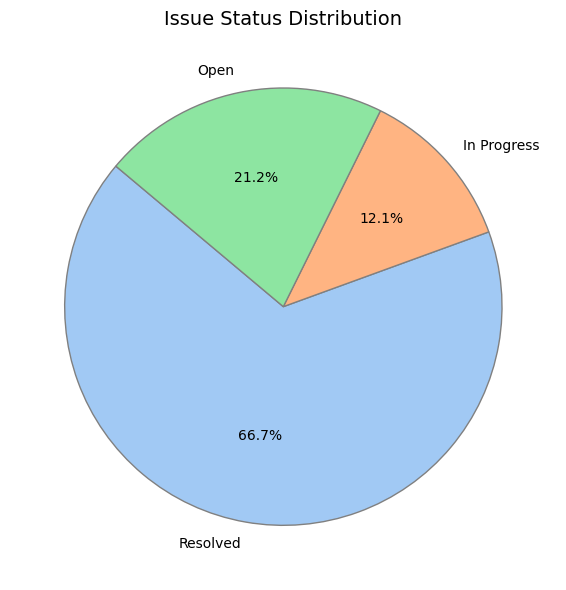

In [76]:
# Query to get status counts
query = text("""
    SELECT status, COUNT(*) AS total
    FROM requests
    GROUP BY status
""")

# Fetch data into DataFrame
with engine.connect() as conn:
    status_df = pd.read_sql(query, conn)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(
    status_df['total'],
    labels=status_df['status'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'grey'}
)

plt.title('Issue Status Distribution', fontsize=14)
plt.tight_layout()
plt.savefig('issue_status_pie_chart.png')
plt.show()

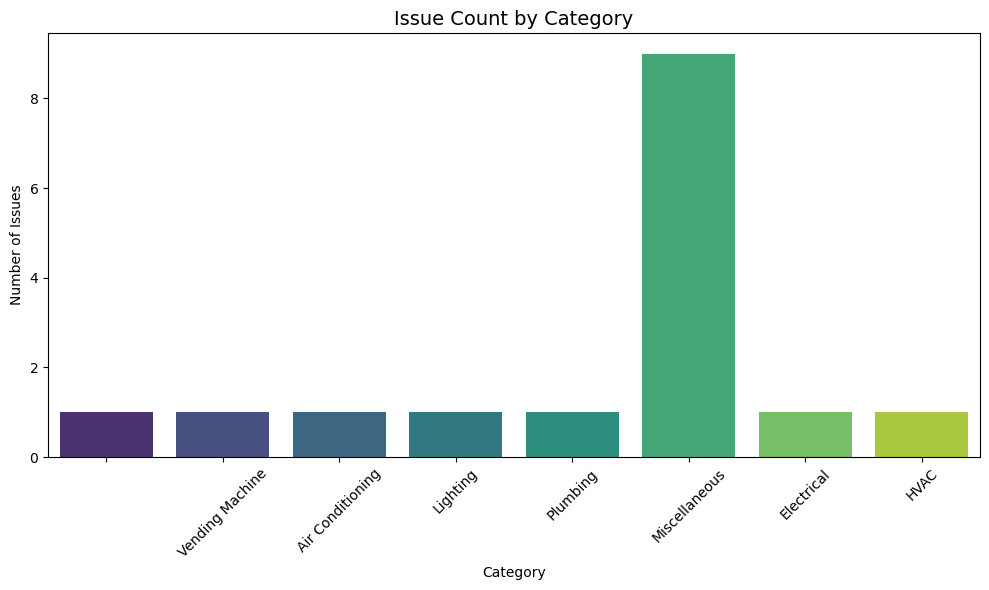

In [24]:
# SQL query to count issues by category
query = text("""
    SELECT category, COUNT(*) AS issue_count
    FROM requests
    GROUP BY category
""")

# Load data into DataFrame
with engine.connect() as conn:
    category_counts_df = pd.read_sql(query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=category_counts_df,
    x='category',
    y='issue_count',
    hue='category',  # add this to map palette correctly
    palette='viridis',
    legend=False     # hides redundant legend
)

plt.title('Issue Count by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Issues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('issue_count_by_category.png')
plt.show()

In [46]:
from datetime import datetime
from sqlalchemy import create_engine, text
import ollama
import json

# Setup database connection (adjust this to your config)
# engine = create_engine("your_connection_string")

def classify_category(description):
    desc = description.lower()
    if any(word in desc for word in ["lamp", "light", "lights", "socket", "outlet", "switch", "power", "electric"]):
        return "Electrical"
    elif any(word in desc for word in ["air conditioner", "air", "ac", "ventilation", "hvac", "fan", "heating"]):
        return "HVAC"
    elif any(word in desc for word in ["pipe", "water", "leak", "sink", "toilet", "shower", "drain"]):
        return "Plumbing"
    else:
        return "Miscellaneous"

def classify_urgency(description, existing):
    desc = description.lower()
    if any(word in desc for word in ["emergency", "fire", "burst", "flood", "leaking", "hazard", "trapped", "injury", "stuck"]):
        return "High"
    elif any(word in desc for word in ["broken", "not working", "malfunction", "doesn't work", "issue"]):
        return "Medium"
    elif any(word in desc for word in [
        "repaint", "scuffed", "paint", "whiteboard", "replace whiteboard",
        "floor mat", "mats", "slippery", "worn", "stained", "tiles", "ceiling tile", "clean"
    ]):
        return "Low"
    if existing in ["High", "Medium", "Low"]:
        return existing
    return "Medium"

def parse_natural_input_with_ollama(raw_text):
    prompt = f"""
You are an assistant that extracts structured information from maintenance requests.

Extract this from the user's text:
- description_raw (the full input)
- category (Electrical, HVAC, Plumbing, or Miscellaneous)
- urgency (High, Medium, or Low)
- status (always 'Open')
- building (e.g., 'Building 1', 'Building 2', etc.)

Return only valid JSON and nothing else.

Input:
\"\"\"{raw_text}\"\"\"
"""

    try:
        response = ollama.chat(
            model='llama3',
            messages=[{"role": "user", "content": prompt}]
        )
        content = response['message']['content'].strip()

        print("\n📦 Raw Ollama output:")
        print(content if content else "<empty>")

        return json.loads(content)

    except json.JSONDecodeError as je:
        print("❌ Ollama returned invalid JSON:", je)
        return None
    except Exception as e:
        print("❌ Ollama failed to respond:", e)
        return None

def newRequest():
    print("📨 SUBMIT NEW REQUEST")

    building_alias_map = {
        "Building 1": "Torre Ribeira",
        "Building 2": "Jardins do Douro",
        "Building 3": "Residencial Foz",
        "Building 4": "Gaia Heights"
    }

    user = input("👤 Enter your name: ")

    with engine.connect() as conn:
        user_result = conn.execute(
            text("SELECT user_id FROM pbs2025bag0u50.users WHERE name = :name"),
            {"name": user}
        ).fetchone()

    if not user_result:
        print("❌ User not found.")
        return

    user_id = user_result[0]
    raw_text = input("📝 Describe the issue: ")

    print("🤖 Processing your request with Ollama...")
    parsed = parse_natural_input_with_ollama(raw_text)

    if not isinstance(parsed, dict):
        print("❌ Could not understand the input.")
        return

    # Force classification
    corrected_category = classify_category(parsed['description_raw'])
    corrected_urgency = classify_urgency(parsed['description_raw'], parsed.get('urgency'))

    print("\n🧠 Parsed Output:")
    for key, value in parsed.items():
        if key == "category":
            print(f"  category: {corrected_category}")
        elif key == "urgency":
            print(f"  urgency: {corrected_urgency}")
        else:
            print(f"  {key}: {value}")

    building_label = parsed['building']
    normalized_building_name = building_alias_map.get(building_label, building_label)

    with engine.connect() as conn:
        building_result = conn.execute(
            text("SELECT building_id FROM pbs2025bag0u50.buildings WHERE name = :name"),
            {"name": normalized_building_name}
        ).fetchone()

    if not building_result:
        print(f"❌ Building '{normalized_building_name}' not found in database.")
        return

    building_id = building_result[0]

    try:
        with engine.begin() as conn:
            conn.execute(
                text("""
                    INSERT INTO pbs2025bag0u50.requests (
                        user_id, building_id, description_raw, category,
                        urgency, status, submitted_at
                    ) VALUES (
                        :user_id, :building_id, :description_raw, :category,
                        :urgency, :status, :submitted_at
                    )
                """),
                {
                    "user_id": user_id,
                    "building_id": building_id,
                    "description_raw": parsed['description_raw'],
                    "category": corrected_category,
                    "urgency": corrected_urgency,
                    "status": parsed['status'],
                    "submitted_at": datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                }
            )
        print("✅ Request successfully saved.")
    except Exception as e:
        print("❌ Failed to save request:", e)


In [50]:
#enter the user name that needs to exist on the table of user and then the issue and Ollama will understand and add to the request table
newRequest()

📨 SUBMIT NEW REQUEST


👤 Enter your name:  Joaquim Silva
📝 Describe the issue:  Lights in the parking lot between Buildings 1 turn off too early


🤖 Processing your request with Ollama...

📦 Raw Ollama output:
{
"category": "Miscellaneous",
"description_raw": "Lights in the parking lot between Buildings 1 turn off too early",
"urgency": "Medium",
"status": "Open",
"building": "Building 1"
}

🧠 Parsed Output:
  category: Electrical
  description_raw: Lights in the parking lot between Buildings 1 turn off too early
  urgency: Medium
  status: Open
  building: Building 1
✅ Request successfully saved.
